In [9]:
import pandas as pd
import numpy as np
import os

In [78]:
### Load the data ###
unit_table_path = "data/unit_table.csv"
if unit_table_path not in os.listdir("data"):
    with open('create_units_table.py') as file:
        exec(file.read())

df = pd.read_csv(unit_table_path)
df

<string>:11: DtypeWarning: Columns (60,62,65,67,69,72,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
/tmp/ipykernel_461061/1193769144.py:7: DtypeWarning: Columns (60,62,65,67,69,72,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(unit_table_path)


,ecephys_unit_id,L_ratio,age_in_days,amplitude_cutoff,anterior_posterior_ccf_coordinate,area_rf,azimuth_rf,c50_dg,cumulative_drift,d_prime,...,DSI,time_to_first_spike_fl,area,session,timescale_ac,err_ac,spike_count_ac,timescale_it,err_it,spike_count_it
0,915957834,0.000308,100.0,0.500000,NaN,900.0,17.778,NaN,120.80,5.418361,...,NaN,0.082,VISpm,732592105.0,69.721586,10.301060,359.0,1.0,0.0,747.0
1,915957857,0.005459,100.0,0.007619,NaN,200.0,90.000,NaN,599.93,5.314885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,915957864,NaN,100.0,0.426632,NaN,500.0,78.000,NaN,528.40,NaN,...,NaN,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,915957872,0.000554,100.0,0.051478,NaN,200.0,10.000,NaN,588.13,5.808960,...,0.018996,0.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,915957876,0.000958,100.0,0.408548,NaN,500.0,86.000,NaN,254.92,4.781547,...,NaN,0.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43489,951912001,0.006118,102.0,0.500000,7533.0,NaN,NaN,NaN,3.10,3.472061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43490,951912003,0.011265,102.0,0.011388,7511.0,1700.0,47.059,NaN,249.96,3.086359,...,0.135370,0.124,VISam,758798717.0,67.729938,43.802506,107.0,1.0,0.0,451.0
43491,951912005,NaN,102.0,0.500000,7533.0,NaN,NaN,NaN,0.00,3.038460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43492,951912013,0.012394,102.0,0.029705,7623.0,NaN,NaN,NaN,20.62,3.799561,...,NaN,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## FIGURE 3 - Features vs cortical visual area ###

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from get_color_palette import get_color_palette
from scipy.ndimage.filters import gaussian_filter1d
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.utils import resample    
from scipy.stats import linregress, pearsonr, spearmanr
from scipy.stats import ks_2samp, ranksums
from statsmodels.stats.multitest import multipletests

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/tmp/ipykernel_461061/2919467234.py:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d
/tmp/ipykernel_461061/2919467234.py:5: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


TOTAL: 36430.0
[-0.357, -0.093, -0.059, 0.152, 0.327, 0.441]
[63.24547983 66.1645768  69.02143523 67.90080738 72.90160183 72.32733003]
[-0.357, -0.093, -0.059, 0.152, 0.327, 0.441]
[567.97635605 713.27063741 698.27586207 739.33102653 810.52631579
 864.70058532]
[-0.357, -0.093, -0.059, 0.152, 0.327, 0.441]
[ 0.14789297 -0.08715597 -0.12770126 -0.14870501 -0.19369814 -0.21785003]
[-0.357, -0.093, -0.059, 0.152, 0.327, 0.441]
[39.57693971 40.58207315 46.27503675 41.229663   49.617678   48.79178342]


/tmp/ipykernel_461061/1665194629.py:210: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(comparison_corrected),cmap='bone',vmin=-5,vmax=np.log10(0.05))
/tmp/ipykernel_461061/1665194629.py:210: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(comparison_corrected),cmap='bone',vmin=-5,vmax=np.log10(0.05))
/tmp/ipykernel_461061/1665194629.py:210: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(comparison_corrected),cmap='bone',vmin=-5,vmax=np.log10(0.05))
/tmp/ipykernel_461061/1665194629.py:210: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(comparison_corrected),cmap='bone',vmin=-5,vmax=np.log10(0.05))


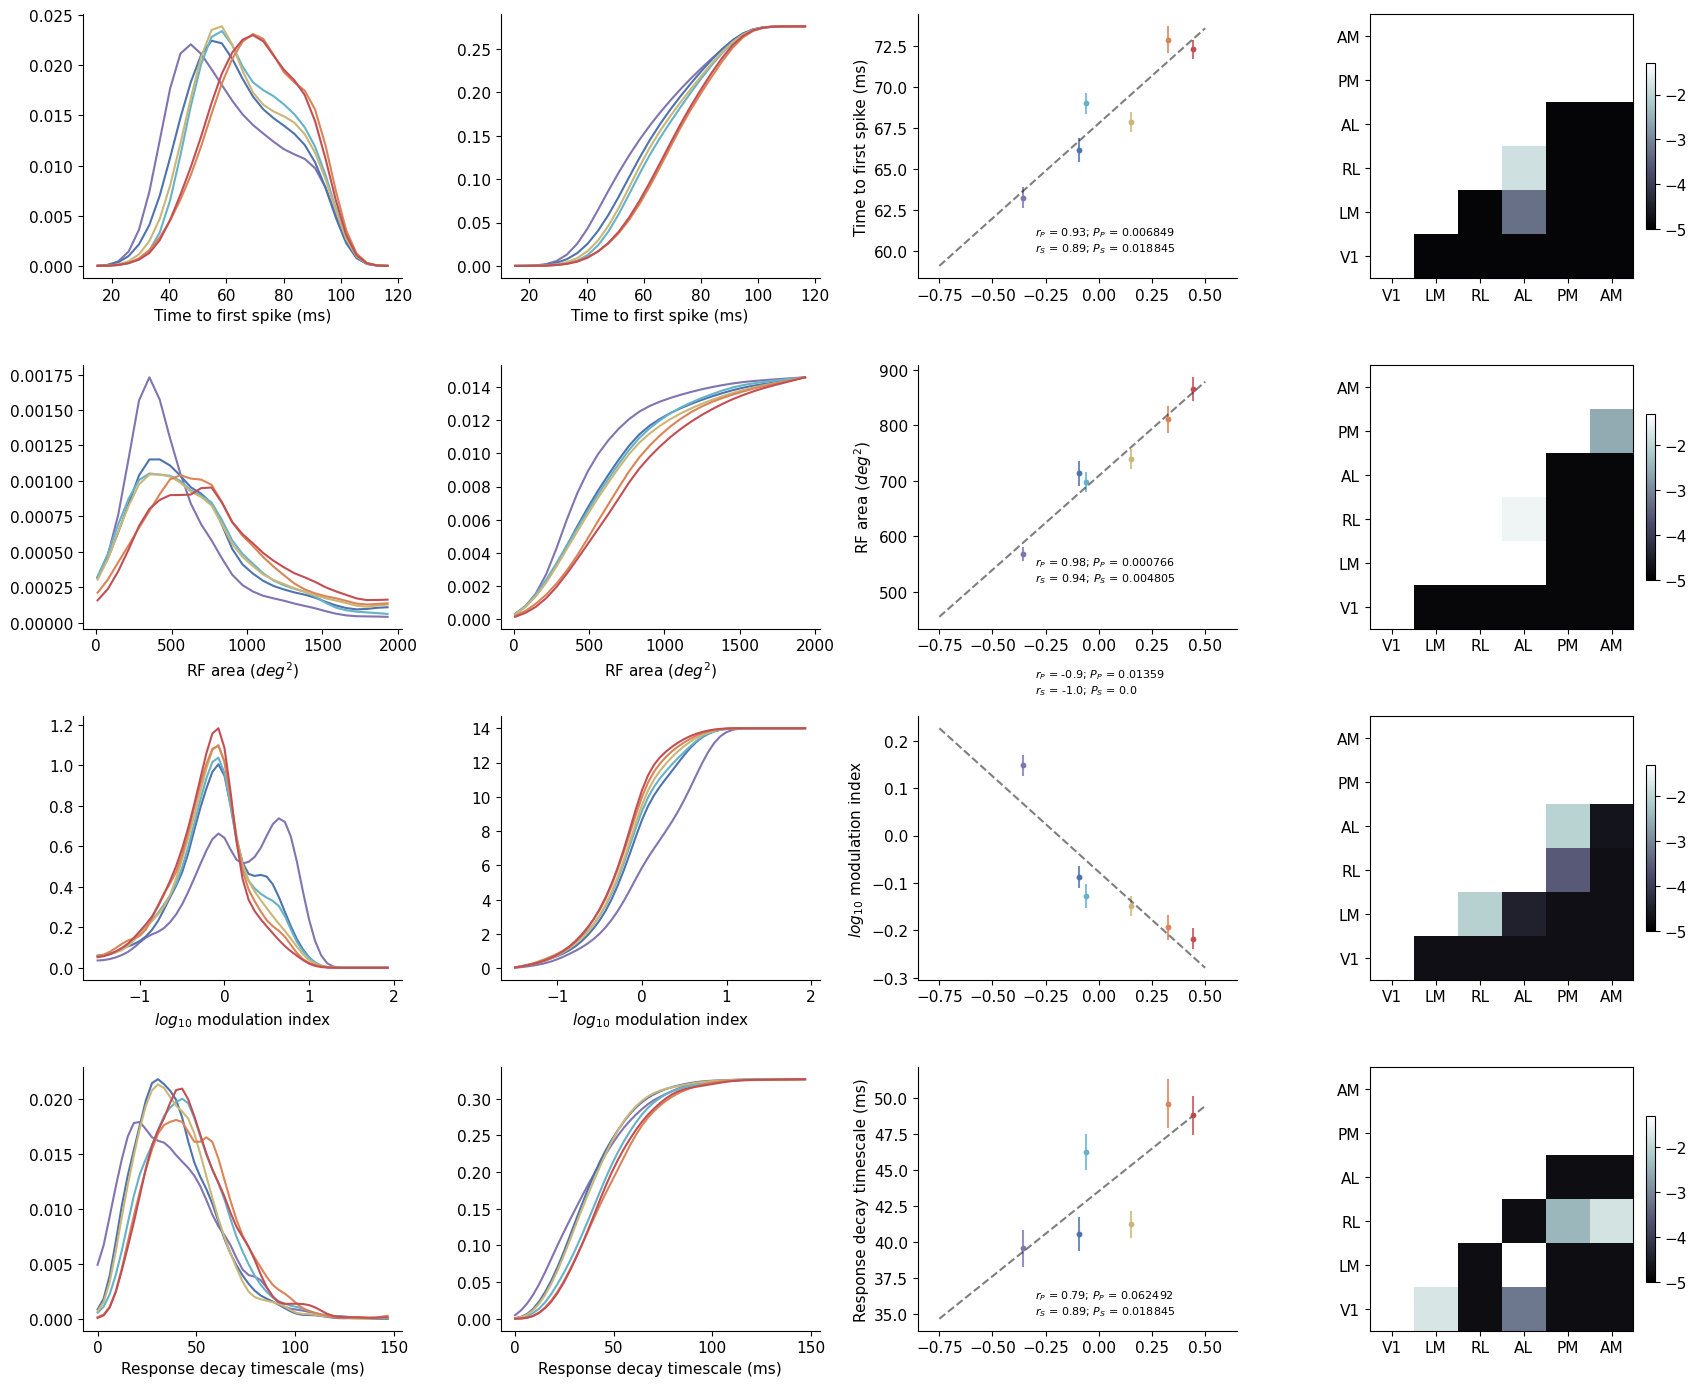

In [29]:
plt.figure(14781, figsize=(17,14))
plt.clf()

# areas = ('LGd','VISp','VISl','VISrl','LP','VISal','VISpm','VISam')
areas = ('VISp','VISl','VISrl','VISal','VISpm','VISam')

color_palette= 'seaborn'

hierarchy_score = {'LGd' : -0.515,
                   'VISp' : -0.357,
                   'VISl' : -0.093,
                   'VISrl' : -0.059,
                   'LP' : 0.105,
                   'VISal' : 0.152,
                   'VISpm' : 0.327,
                   'VISam' : 0.441}

# HS = [-0.515, -0.357, -0.093, -0.059, 0.105, 0.152,0.327, 0.441]
HS = [-0.357, -0.093, -0.059, 0.152,0.327, 0.441]

num_units = 0
unit_count = np.zeros((4,))
mouse_count = np.zeros((4,))

def get_bootstrap_95ci(M, measure_of_central_tendency, N=1000):
    n = int(len(M)/2)
    est = np.zeros((N,))
    for i in range(N):
        boot = M[np.random.permutation(len(M))[:n]]
        est[i] = measure_of_central_tendency(boot)
        
    return np.percentile(est,97.5) - np.nanmean(est)

def convert_to_ms(value_in_s):
    return value_in_s*1000

def take_log(original_value):
    return np.log10(original_value)

def do_not_change(original_value):
    return original_value

measure_of_central_tendency = np.nanmean

np.random.seed(10)

num_per_area = np.zeros((len(areas),))
num_with_rfs = np.zeros((len(areas),))
num_after_filter = np.zeros((len(areas),))
num_after_fl = np.zeros((len(areas),))
num_after_ac = np.zeros((len(areas),))
mice_per_area = np.zeros((len(areas),))

if True:
    metrics = ['time_to_first_spike_fl', 'area_rf', 'mod_idx_dg', 'timescale_ac']
    labels = ['Time to first spike (ms)', 'RF area ($deg^2$)', '$log_{10}$ modulation index', 'Response decay timescale (ms)']
    bins = [np.linspace(15,120,30), np.linspace(10,2000,30), np.linspace(-1.5,2,50), np.linspace(0,150,50)]
    function_to_apply = [convert_to_ms, do_not_change, take_log, do_not_change]
    y_vals = [60, 520, 0.3, 35]

else:
    metrics = [ 'firing_rate']
    labels = ['$log_{10}$ Firing rate']
    bins = [np.linspace(-1,2)]
    function_to_apply = [take_log]
    y_vals = [0.75]

centers = np.zeros((len(areas),len(metrics)))
errorbars = np.zeros((len(areas),len(metrics)))

max_values = np.zeros((len(metrics),))

all_values = {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}}

#all_df = []

for area_idx, area in enumerate(areas):
    
    selection = (df.ecephys_structure_acronym == area) #& \
    
    num_per_area[area_idx] = np.sum(selection)
    
    selection &= (df.p_value_rf < 0.01) #& \
    
    num_with_rfs[area_idx] = np.sum(selection)
    
    selection &= (df.area_rf < 2500)
    selection &= (df.snr > 1)
    selection &= (df.firing_rate_dg > 0.1)

    num_after_filter[area_idx] = np.sum(selection)
    
    #all_df.append(df[selection])
             
    mice_per_area[area_idx] = len(df[selection].specimen_id.unique())
    
    for metric_idx, metric in enumerate(metrics):
        
        if metric_idx == 0:
            selection &= (df.time_to_first_spike_fl < 0.1) 
            num_after_fl[area_idx] = np.sum(selection)
        elif metric_idx == 3:
            selection &= (df[metric] < 300)
            selection &= (df[metric] > 1)
            selection &= (df.spike_count_ac > 50)
            selection &= (df.err_ac < 20)
            num_after_ac[area_idx] = np.sum(selection)

        M = function_to_apply[metric_idx](df[selection][metric].values) 

        all_values[metric_idx][area] = M
        h, b = np.histogram(M, bins=bins[metric_idx], density=True)
    
        h_filt = gaussian_filter1d(h,1.5)
        
        unit_count[metric_idx] += len(M)
        
        max_values[metric_idx] = np.max([np.max(h_filt), max_values[metric_idx]])

        plt.subplot(len(metrics), 4, metric_idx*4+1)
        plt.plot(b[:-1],h_filt,color=get_color_palette(areas[area_idx], color_palette))
        plt.xlabel(labels[metric_idx])
        
        plt.subplot(len(metrics), 4, metric_idx*4+2)
        plt.plot(b[:-1],np.cumsum(h_filt),color=get_color_palette(areas[area_idx], color_palette))
        plt.xlabel(labels[metric_idx])
        
        centers[area_idx, metric_idx] = measure_of_central_tendency(M)
        errorbars[area_idx,  metric_idx] = get_bootstrap_95ci(M, measure_of_central_tendency) #np.nanstd(M) / np.sqrt(len(M))
        
print('TOTAL: ' + str(np.sum(num_per_area)))

x = HS
    
for i in range(len(metrics)):
    
    plt.subplot(len(metrics),4,i*4+3)
    y = centers[:,i]
    
    for k in range(len(areas)):
        plt.plot(x[k], centers[k,i],'.',color=get_color_palette(areas[k], color_palette))
        plt.errorbar(x[k], centers[k,i], yerr = errorbars[k,i], fmt='.',color=get_color_palette(areas[k], color_palette),alpha=0.8)

    slope,intercept,r,p,std = linregress(x,y)
    x2 = np.linspace(-0.75,0.5,10)
    
    plt.plot(x2,x2*slope+intercept,'--k', alpha=0.5)
    
    r_s,p_s = spearmanr(x,y)
    print(x)
    print(y)
    r_p,p_p = pearsonr(x,y)
    
    text =  '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,6)) + '\n' + \
            '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,6))
    
    plt.text(-0.30,y_vals[i],text,fontsize=8)
    plt.ylabel(labels[i])
        
for i in range(len(metrics)):
    for j in range(2):
        plt.subplot(len(metrics),4,i*4+1+j)
        ax = plt.gca()
        #plt.gca().get_yaxis().set_visible(False)
        [ax.spines[loc].set_visible(False) for loc in ['top', 'right']]        
    
    plt.subplot(len(metrics),4,i*4+3)
    ax = plt.gca()
    [ax.spines[loc].set_visible(False) for loc in ['right', 'top']]   
    plt.xlim([-0.85,0.65])

alpha = 0.05

# common_names = ['LGN', 'V1', 'LM', 'RL', 'LP', 'AL', 'PM', 'AM']
common_names = ['V1', 'LM', 'RL', 'AL', 'PM', 'AM']

for metric_idx, metric in enumerate(metrics):
    
    comparison_matrix = np.zeros((len(areas),len(areas))) #+ 1000
    
    for area_idx1, area1 in enumerate(areas):
        
        for area_idx2, area2 in enumerate(areas):
            
            if area_idx2 > area_idx1:
                
                v1 = all_values[metric_idx][area1]
                v2 = all_values[metric_idx][area2]
                
                z, p = ranksums(v1[np.invert(np.isnan(v1))],
                                   v2[np.invert(np.isnan(v2))] )
                comparison_matrix[area_idx1, area_idx2] = p + 1e-5
       
    p_values = comparison_matrix.flatten()
    ok_inds = np.where(p_values > 0)[0]
    inds = np.where(comparison_matrix > 0)
    indx = inds[0]
    indy = inds[1]
    
    reject, p_values_corrected, alphaSidak, alphacBonf = multipletests(p_values[ok_inds], alpha=alpha, method='fdr_bh')
            
    p_values_corrected2 = np.zeros((len(p_values),))
    p_values_corrected2[ok_inds] = p_values_corrected
    comparison_corrected = np.reshape(p_values_corrected2, comparison_matrix.shape)
    
    sig_thresh = np.log10(alpha)
    plot_range = len(areas)
    
    plt.subplot(len(metrics),4,metric_idx*4+4)
    plt.imshow(np.log10(comparison_corrected),cmap='bone',vmin=-5,vmax=np.log10(0.05))
    
    plt.colorbar(fraction=0.026, pad=0.04)
    
    plt.xticks(ticks=np.arange(len(common_names)), labels=common_names)
    plt.yticks(ticks=np.arange(len(common_names)), labels=common_names)
    plt.ylim([-0.5,len(common_names)-0.5])
    plt.xlim([-0.5,len(common_names)-0.5])    
    
plt.tight_layout()
plt.savefig('figures/fig_3_features_vs_cortical_area.png', dpi=300)

## Figure 10

### Figure 10 a

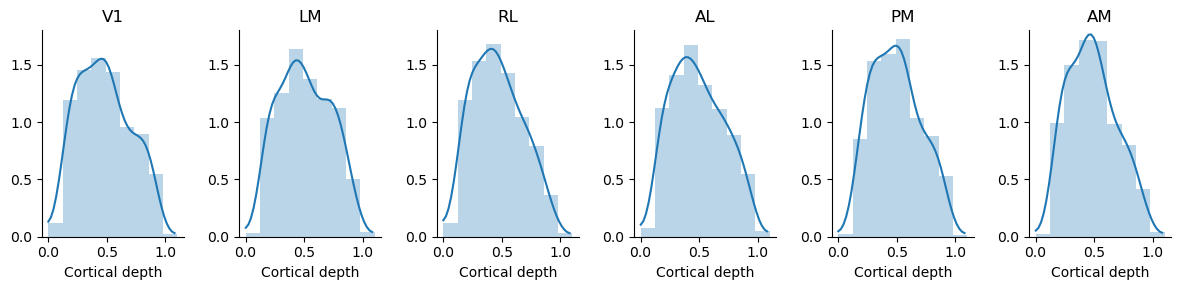

In [20]:
areas = ['VISp', 'VISl', 'VISrl', 'VISal', 'VISpm', 'VISam']
area_names = ['V1', 'LM', 'RL', 'AL', 'PM', 'AM']

plt.figure(14914, figsize=(12, 3))
plt.clf()

for area_idx, area in enumerate(areas):
    
    plt.subplot(1,6,area_idx+1)
    
    sub_df = df[df.ecephys_structure_acronym == area]
    
    h,b = np.histogram(sub_df.cortical_depth, np.linspace(0.001,1.1,10), density=True)
    bin_width = np.mean(np.diff(b))
    plt.bar(b[:-1] + bin_width/2,h, width=bin_width, alpha=0.3)
    
    h,b = np.histogram(sub_df.cortical_depth, np.linspace(0.001,1.1,50), density=True)
    bin_width = np.mean(np.diff(b))
    plt.plot(b[:-1],gaussian_filter1d(h,3))
    plt.ylim([0,1.8])
    
    plt.xlabel('Cortical depth')
    
    plt.title(area_names[area_idx])
    
    ax = plt.gca()
    [ax.spines[loc].set_visible(False) for loc in ['right', 'top']]   

    
plt.tight_layout()
plt.savefig('figures/fig_10_a_depth_distribution.png', dpi=300)

### Figure 10 b1 - Features vs Cortical depth

[[2633. 2555. 4864. 1129.]
 [2633. 2555. 4864. 1129.]
 [2633. 2555. 4864. 1129.]
 [1209. 1195. 2500.  490.]]


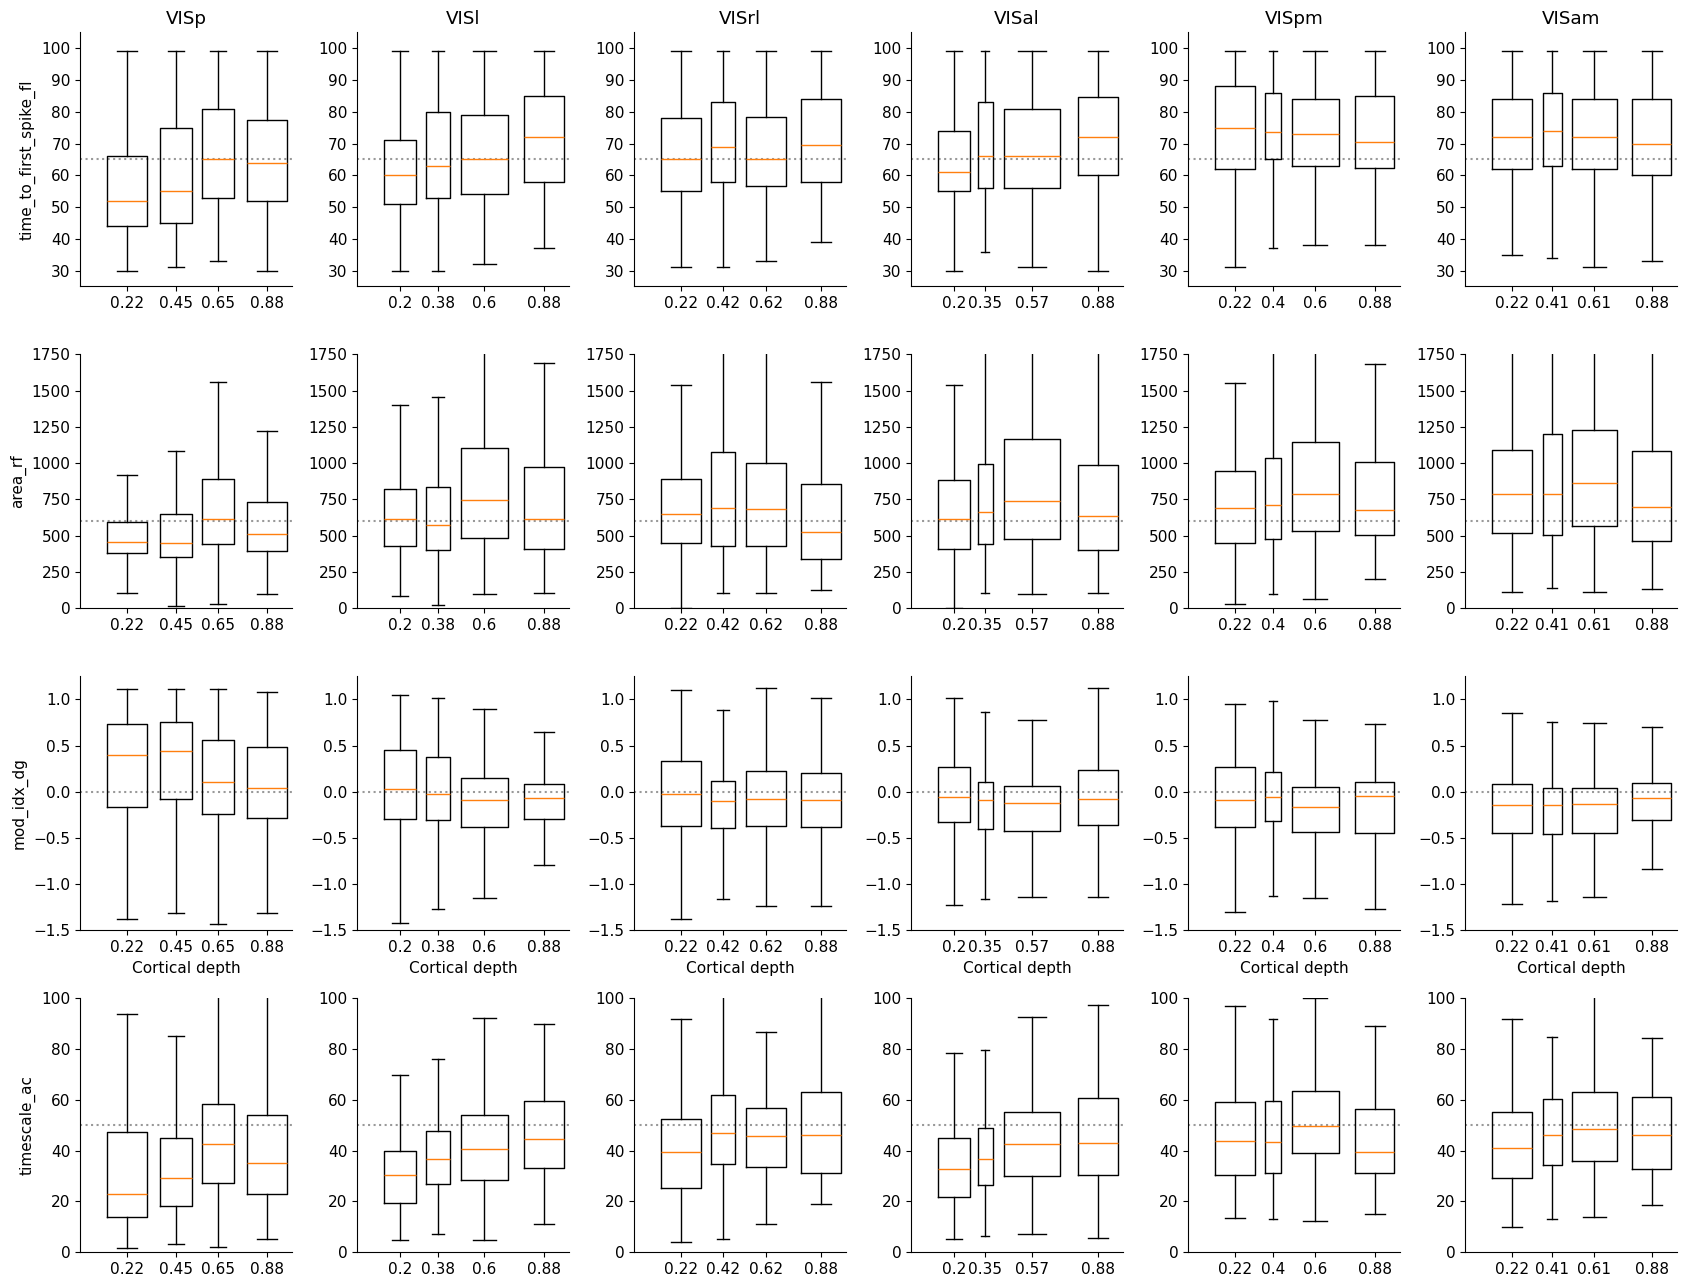

In [26]:
plt.rcParams.update({'font.size': 11})

plt.figure(14915, figsize=(17, 13))
plt.clf()

def convert_to_ms(value_in_s):
    return value_in_s*1000

def take_log(original_value):
    return np.log10(original_value)

def do_not_change(original_value):
    return original_value

def get_bootstrap_95ci(M, measure_of_central_tendency, N=1000):
    n = int(len(M)/2)
    est = np.zeros((N,))
    for i in range(N):
        boot = M[np.random.permutation(len(M))[:n]]
        est[i] = measure_of_central_tendency(boot)
        
    return np.percentile(est,97.5) - np.nanmean(est)

measure_of_central_tendency = np.nanmean

metrics = ['time_to_first_spike_fl', 'area_rf', 'mod_idx_dg', 'timescale_ac']
labels = ['Time to first spike (ms)', 'RF area ($deg^2$)', '$log_{10}$ modulation index', 'Autocorrelation timescale (ms)']
bins = [np.linspace(0,250,30), np.linspace(10,2000,30), np.linspace(-1.5,2,50), np.linspace(0,400,100)]
function_to_apply = [convert_to_ms, do_not_change, take_log, do_not_change]
y_lims = [[25,105], [0,1750], [-1.5,1.25], [0,100]]
y_line = [65, 600, 0.0, 50]

layers = [2,4,5,6]
layer_pts = [[[0.1,0.35],[0.35,0.55],[0.55,0.75],[0.75,1.0]],
             [[0.1,0.3],[0.3,0.45],[0.45,0.75],[0.75,1.0]],
             [[0.1,0.35],[0.35,0.5],[0.5,0.75],[0.75,1.0]],
             [[0.1,0.3],[0.3,0.4],[0.4,0.75],[0.75,1.0]],
             [[0.1,0.35],[0.35,0.45],[0.45,0.75],[0.75,1.0]],
             [[0.1,0.35],[0.35,0.47],[0.47,0.75],[0.75,1.0]]
             ]

HS = [-0.357, -0.093, -0.059, 0.152,0.327, 0.441]

mean_values = np.zeros((6,4,4))
ci_values = np.zeros((6,4,4))
total_n = np.zeros((6,4,4))

for area_idx, area in enumerate(areas):
    
    selection = (df.ecephys_structure_acronym == area) #& \
    
    selection &= (df.p_value_rf < 0.01) #& \
    selection &= (df.cortical_depth > 0.0)
    
    selection &= (df.area_rf < 2500)
    selection &= (df.snr > 1)
    selection &= (df.firing_rate_dg > 0.1)
    
    for metric_idx, metric in enumerate(metrics):
                
        plt.subplot(4, 6, area_idx+metric_idx * 6 + 1)
        
        if metric_idx == 0:
            selection &= (df.time_to_first_spike_fl < 0.1) 
            plt.title(area)
        elif metric_idx == 3:
            selection &= (df[metric] < 300)
            selection &= (df[metric] > 1)
            selection &= (df.spike_count_ac > 50)
            selection &= (df.err_ac < 20)
            #num_after_ac[area_idx] = np.sum(selection)

        M = function_to_apply[metric_idx](df[selection][metric].values) 
            
        if area_idx == 0:
            plt.ylabel(metric)
            
        if metric_idx == 2:
            plt.xlabel('Cortical depth')

        if metric_idx == 1:
            M = M + np.random.rand(len(M)) * 100
        
        #plt.scatter(df[selection].cortical_depth, M, c=df[selection].cortical_layer, s=4.0, alpha=0.6, cmap='Spectral')
        
        y = y_line[metric_idx]
        plt.plot([0.0,1.1],[y,y],':k',alpha=0.4)
        
        for layer_idx, layer in enumerate(layers):
            
            selection2 = (df.cortical_layer == layer)
            M = function_to_apply[metric_idx](df[selection & selection2][metric].values) 
            if metric_idx == 1:
                M = M + np.random.rand(len(M)) * 100
            
            m = np.mean(M)
            total_n[area_idx, metric_idx, layer_idx] = len(M)
            
            mean_values[area_idx, layer_idx, metric_idx] = m
            ci_values[area_idx, layer_idx, metric_idx] = get_bootstrap_95ci(M, measure_of_central_tendency)
            #plt.plot(layer_pts[area_idx][layer_idx],[m, m], '-k')
            
            s = np.around(np.mean(layer_pts[area_idx][layer_idx]),2)
            w = layer_pts[area_idx][layer_idx][1] - layer_pts[area_idx][layer_idx][0]
        
            plt.boxplot(M, positions = [s], widths=[w*0.75], sym='') #, notch=True)
            
        ax = plt.gca()
        [ax.spines[loc].set_visible(False) for loc in ['right', 'top']]  
        
        plt.ylim(y_lims[metric_idx])
        plt.xlim([0.0,1.0])
        #ax.set_xticks(ticks=np.arange(0.2,0.8,0.2))
        
print(np.sum(total_n,0))
plt.tight_layout()
plt.savefig('figures/fig_10_b1_features_vs_cortical_depth.png', dpi=300)


### Figure 10 b2 - Features vs layers

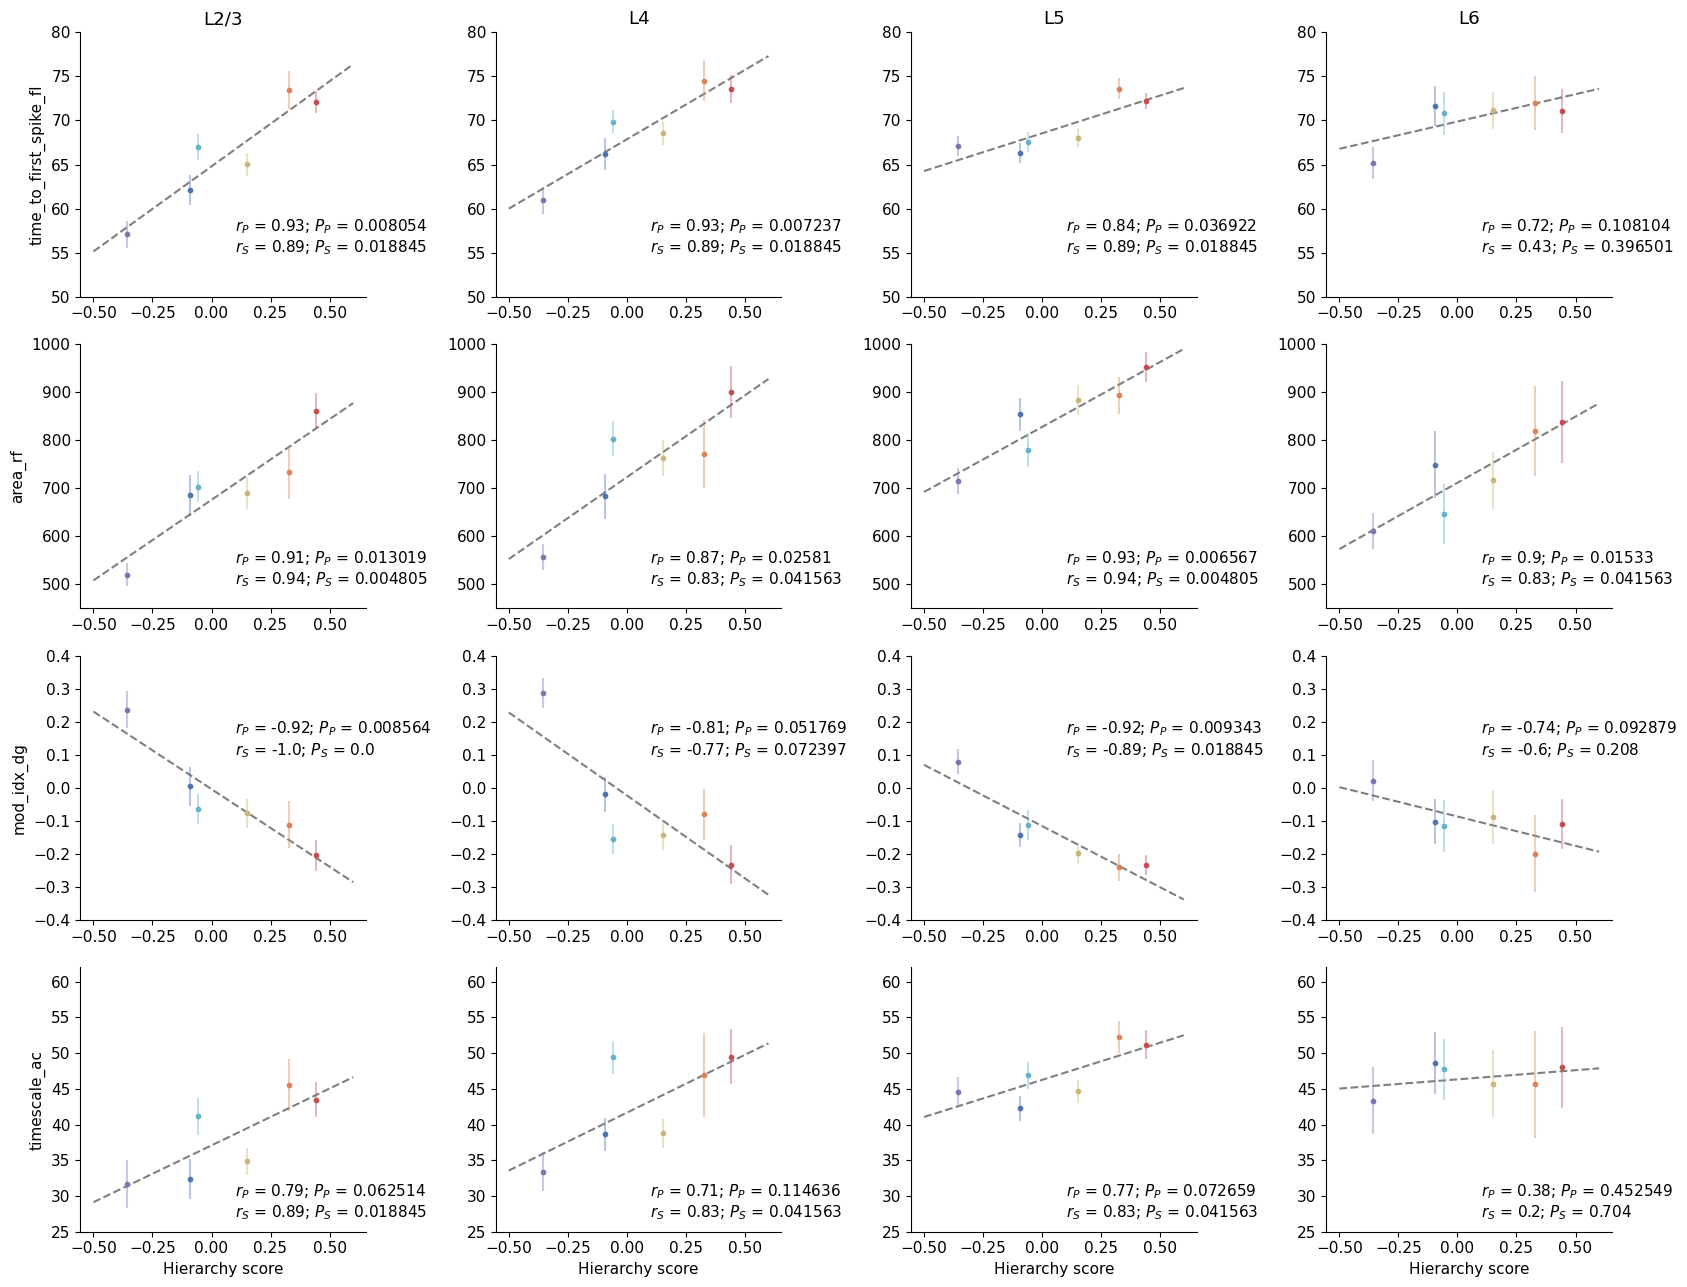

In [27]:
plt.figure(1911, figsize=(17, 13))
plt.clf()
YYY = [55,500, 0.1, 27]
YLIMS = [[50,80],[450,1000],[-.4,0.4],[25,62]]

layer_names = ['L2/3', 'L4', 'L5', 'L6']

for metric_idx, metric in enumerate(metrics):
    
    for layer_idx, layer in enumerate(layers):
        
        plt.subplot(4,4,metric_idx * 4+layer_idx + 1)
        
        x = HS
        y = mean_values[:,layer_idx, metric_idx]
        s = ci_values[:,layer_idx, metric_idx]
        
        slope,intercept,r,p,std = linregress(x,y)
        x2 = np.linspace(-0.5,0.6,10)
        
        plt.plot(x2,x2*slope+intercept,'--k', alpha=0.5)
        
        r_s,p_s = spearmanr(x,y)
        r_p,p_p = pearsonr(x,y)
        
        text =  '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + \
                 '; $P_P$ = ' + str(np.around(p_p,6)) + '\n' + \
                '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,6))             #';
        plt.text(0.1,YYY[metric_idx],text,fontsize=11)
        
        ax = plt.gca()
        [ax.spines[loc].set_visible(False) for loc in ['right', 'top']]  
                
        
        for k, area in enumerate(areas):        
            plt.plot(x[k], y[k], '.', color=get_color_palette(area, 'seaborn'))
            plt.errorbar(x[k], y[k], yerr = s[k], fmt='.',color=get_color_palette(area, 'seaborn'),alpha=0.4)
    
            
        plt.ylim(YLIMS[metric_idx])
        
        if metric_idx == 0:
            plt.title(layer_names[layer_idx])
        
        if layer_idx == 0:
            plt.ylabel(metric)
            
        if metric_idx == 3:
            plt.xlabel('Hierarchy score')
            
plt.tight_layout()
plt.savefig('figures/fig_10_b2_features_vs_layers.png', dpi=300)


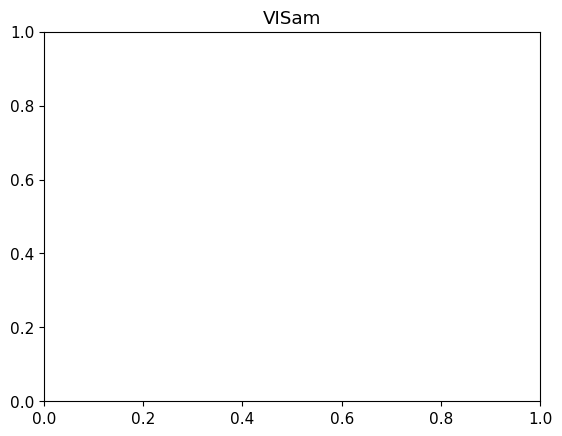

In [28]:
from scipy.stats import ranksums

significance_values = np.zeros((6,4))
difference_values = np.zeros((6,4))

for area_idx, area in enumerate(areas):
    
    #selection = (df.ecephys_structure_acronym == area) #& \
    
    selection = (df.p_value_rf < 0.01) #& \
    selection &= (df.cortical_depth > 0.0)
    
    selection &= (df.area_rf < 2500)
    selection &= (df.snr > 1)
    selection &= (df.firing_rate_dg > 0.1)
    
    for metric_idx, metric in enumerate(metrics):
                
        if metric_idx == 0:
            selection &= (df.time_to_first_spike_fl < 0.1) 
            plt.title(area)
        elif metric_idx == 3:
            selection &= (df[metric] < 300)
            selection &= (df[metric] > 1)
            selection &= (df.spike_count_ac > 50)
            selection &= (df.err_ac < 20)

  
        selection2 = (df.cortical_layer < 5)
        
        M_upper = function_to_apply[metric_idx](df[selection & selection2][metric].values) 
        
        selection2 = (df.cortical_layer >= 5)
        
        M_lower = function_to_apply[metric_idx](df[selection & selection2][metric].values) 
        
        difference_values[area_idx, metric_idx] = np.mean(M_upper) - np.mean(M_lower)
        
        stat, p = ranksums(M_upper, M_lower)
        
        significance_values[area_idx, metric_idx] = p